<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Необходимые шаги, перед работой на проекте с медицинскими данными**




*   Определить концепты (области) интереса
*   Релевантные концепты/сущности для анализа: заболевания, препараты, лабораторные тесты, терапия
*   Определить уровень гранулярности информации запроса
*   Определить уровень гранулярности информации в источнике










# Шаг 1. Определить концепты (области) интереса

---



  На этапе коммерческого заказа, мы получаем набор требований, где будет оговорено, **что** необходимо сделать, источник данных, в какие сроки и за какие ресурсы
Также описывается что должно быть исключено из анализа

  Давайте сформулируем набор требований, задач **NER** (named entity recognition), необходимые значения, даты.
Давайте взглянем на словарь.
---

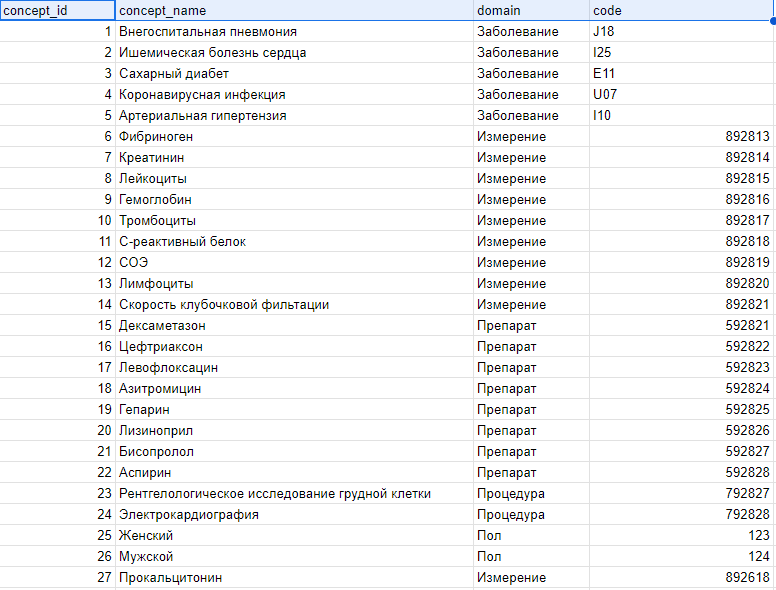

**Поля:**

*   *concept_id* - уникальный первичный ключ всех сущностей в словаре
*   *concept_name* - уникальное название сущностей в словаре
*   *domain* - область сущности
*   *concept_code* - код источника (из словаря источника: МКБ-10, LOINC)
---
Словарь, в данном случае, область интереса заказчика.

Учитывая, что в нашем проекте, есть конкретный набор интереса, это и будет нашими релевантными сущностями для анализа. То есть, шаг 2 также завершён







# Шаг 3. Определить уровень гранулярности информации  запроса
---

Гранулярность подразумевает степень детализации информации.
Для примера возьмём артериальную гипертензию (АГ) (это заболевание, при котором повышено артериальное давление).
Согласно классификации АГ имеет 3 степени. То есть, если исследователь заинтересован только в исследовании 2 степени АГ, необходимо иметь уровень гранулярности до степени.
Также, согласно стратификации рисков, АГ имеет 4 группы.

Типичное представление в данных: АГ 2ст., риск 4.


1.   уровень гранулярности: есть АГ или нет?
2.   уровень гранулярности: есть степень 2?
3.   уровень гранулярности: есть ли риск 4?






# Шаг 4. Определить уровень гранулярности информации в источнике
---

То есть, запрос на уровень гранулярности у нас есть, но мы сразу же должны убедиться, что эта информация есть в исходных данных.




В нашем случае, гранулярность информации достаточна для удовлетвореня запроса.

Посмотрим на источник и, в контексте нашей коммерческой задачи, попробуем вручную определить, что необходимо найти, получить и сформировать структуру данных



```
Эпикриз из медицинской карты
стационарного пациента №  1086
Ф.И.О: Григорьевна, 24.02.1938
Место жительства:
Место работы:
Поступил: 19.01.2021 Выписан: 05.02.2021
Диагноз заключительный: Сахарный диабет 1 типа, инсулинзависимый, декомпенсация. Гипергликемическая кома.    ИБС: Атеросклеротический кардиосклероз. Н1. Дисметаболическая энцефалоптия. Антибиотикассоциированная диарея. Анемия легкой степени
Состояние и жалобы при поступлении: Жалобы пациента: пациентка доставлена в приемное отдлеление ГУК  в тяжелом состояниее, без сознания, контакту недоступна.  
Общее состояние пациента: тяжелое  Сознание: кома 1   Положение: вынужденное  Питание: нормальное  Кожные покровы: бледные  Кожная сыпь: нет Отеки, пастозность: нет Видимые слизистые: бледные   Лимфоузлы: не увеличены  Мышечная и костно-суставная система: без отклонений от нормы  Tемпература тела    36.6  SPO2 95 % Органы кровообращения Пульс   98 в мин  ритмичный Артериальное давление:    80/40 мм рт ст Границы сердца не расширены Тоны сердца:  приглушены ритмичные   Шумы нет
Органы дыхания Перкуторно: звук ясный легочный   Дыхание: везикулярное ослаблено с обеих сторон  в н/о Хрипы: нет   Число дыханий __28_  в мин.   Одышка носит смешанный
Органы пищеварения Язык: сухой   Печень:не увеличена  ___ Желчный пузырь:не определяется Перистальтика кишечника:есть Живот мягкий доступен для губокой пальпации во всех отделах
Консультации врачей-узких специалистов, консилиумы врачей:
-Консультирована доцентом А М
-Консультация врача-психиатра - Дисметаболическая энцефалоптия.
Рекомендовано: 1)Эмоксипин 0.5%-100 мл через 12 часов ,   витаминотерапия( В1, В6).
2) Лечение основного заболевания. 3) При необходимости повторная консультация.
21.01.2021, 11:24;  врач-психиатр-нарколог: Ольга Ивановна
-Консультация врача - эндокринолога - Диагноз:  E10  Сахарный диабет  1 тип./ (основной) /  
Рек-но:- стол Мд ограничение жиров углеводов - Моноинсулин 10 ед завтрак, 12 ед обед, 10 ед ужин  23.00- 4 ед - контроль гликемии в динамике, коррекция дозы инсулина по уровню гликемии
27.01.2021, 11:00;  врач-эндокринолог: Елена Викторовна
-Консультация врача физиотерапевта.
Квантовая терапия на кубитальную вену  от аппарата Витязь  №6.
28.01.2021, 08:50;  врач-физиотерапевт: Лариса Васильевна
-Конультация врача ЛФК - Рекомендована УГГ на момент осмотра и рекомендована повторная консультация при согласовании с леч врачом.
28.01.2021, 10:23;  врач-физиотерапевт: Елена Николаевна
-Консультация эндокринолога - Диагноз:  E10  Сахарный диабет 1 тип./ (основной) /  
Рек-но:- стол Мд ограничение жиров углеводов  -на абулаторный этап Актрапид 8 ед перед завтраков, 8 ед перед обедом, 6 ед перед ужином  -Протафан  6 ед в 22.00-п\к
- контроль гликемии ежедневно, коррекция дозы по уровню гликемии,  наблюдение по м\ж  04.02.2021, 12:41;  врач-эндокринолог:  Елена Викторовна
Результаты инструментальных и аппаратных методов исследования:
Рентгенография (обзорная) грудной полости в одной проекции   №   20.01.2021 -
Р-грамма выполнена в вынужденной положении-лежа на спине,палатным аппаратом.Легочные поля воздушны.Паратрахеальная зона расширена за счет сосудов.Корни бесструктурны,правый прикрыт тенью сердца.Диафрагма без особенностей.Видимые части синусов свободны.Аорта удлинена,уплотнена,склерозирована в области дуги.Сердце расширено в поперечнике .
Эклетрокардиограмма в палате     26.01.2021 - Ритм предсердный,нерегулярный с ЧЖС 77 уд/мин.
Улучшение процессов реполяризации по всей передней стенке ЛЖ.
Электрокардиограмма в реанимации     20.01.2021 - Ритм предсердный,нерегулярный с ЧЖС 88 уд/мин. ГЛП. Одиночная НЭС.
Электрокардиограмма в реанимации     21.01.2021 - Ритм предсердный,нерегулярный с ЧЖС 83 уд/мин. Данные те же.
Результаты лабораторных исследований:
ИФА анализ 19.01.2021: Антитела к SARS-Cov-2 (Ig M) не выявлены; Антитела к SARS-Cov-2 (Ig G) не выявлены;
Гликемический профиль 19.01.2021: 16 ч. 00 мин. 28,3 ммоль/л;
Глюкоза крови 19.01.2021: Концентрация глюкозы 29 ммоль/л;
Биохимическое исследование крови 19.01.2021: Общий белок 56 г/л; Мочевина 13 ммоль/л ( 1.7-8.3 )ммоль/л; Креатинин 159 мкмоль/л ( 53-115 )мкмоль/л; Билирубин общий 12 мкмоль/л ( 5-20.5 )мкмоль/л; Глюкоза крови 27 ммоль/л ( 3.5-6.2 )ммоль/л; Аспартатаминотрансфераза 35 Ед/л ( 5-37 )Ед/л; Аланинаминотрансфераза 42 Ед/л ( 5-42 )Ед/л; Амилаза 391 Ед/л ( 18-80 )Ед/л; Натрий 139 ммоль/л ( 130-155 )ммоль/л; Калий 4,8 ммоль/л ( 3.2-5.6 )ммоль/л; Хлориды 98 ммоль/л ( 95-110 )ммоль/л;
Глюкоза крови 20.01.2021: Концентрация глюкозы 8 ммоль/л;
Глюкоза крови 20.01.2021: Концентрация глюкозы 7,8 ммоль/л;
Глюкоза крови 20.01.2021: Концентрация глюкозы 11,3 ммоль/л;
Гемостазиограмма 20.01.2021: Активир. частичное тромбопластин. время 24,7  сек ( 22-35 ) сек; Протромбированное время 8,6  сек ( 9.4-12.5 ) сек; Активн. протромбирован.комплекса (по Квику) 167 % ( 83-150 )%; Международное нормализованное отношение 0,59 ( 0.85-1.3 ); Фибриноген 2,42 г/л ( 2.7-4.7 )г/л;
Общий анализ крови 20.01.2021: Эритроциты 4 х10*12/л; Гемоглобин 124 г/л ( 120-150 )г/л; Лейкоциты 11 х10*9/л ( 4-9 )х10*9/л; Цветовой показатель 0,93; Гематокрит 35 % ( 36-42 )%; Тромбоциты 212 х10*9л ( 150-450 )х10*9л; Нейтрофилы палочкоядерные 10 % ( 1-5 )%; Нейтрофилы сегментоядерные 74 % ( 40-70 )%; Лимфоциты 9 % ( 19-37 )%; Моноциты 7 % ( 3-8 )%; \С у м м а   к л е т о к: 100;
Глюкоза крови 21.01.2021: Концентрация глюкозы 17,4 ммоль/л;
Гемостазиограмма 21.01.2021: Активир. частичное тромбопластин. время 22  сек ( 22-35 ) сек; Протромбированное время 10,7  сек ( 9.4-12.5 ) сек; Активн. протромбирован.комплекса (по Квику) 95,1 % ( 83-150 )%; Международное нормализованное отношение 0,76 ( 0.85-1.3 ); Фибриноген 4 г/л ( 2.7-4.7 )г/л;
Общий анализ крови 21.01.2021: Эритроциты 4,19 х10*12/л; Гемоглобин 130 г/л ( 120-150 )г/л; Лейкоциты 8,02 х10*9/л ( 4-9 )х10*9/л; Цветовой показатель 0,98; Гематокрит 0,37 % ( 36-42 )%; Тромбоциты 175 х10*9л ( 150-450 )х10*9л; Нейтрофилы палочкоядерные 13 % ( 1-5 )%; Нейтрофилы сегментоядерные 74 % ( 40-70 )%; Лимфоциты 8 % ( 19-37 )%; Моноциты 5 % ( 3-8 )%; \С у м м а   к л е т о к: 100; Токсогенная зернистость +;
Гемостазиограмма 22.01.2021: Активир. частичное тромбопластин. время 21,1  сек ( 22-35 ) сек; Протромбированное время 8,8  сек ( 9.4-12.5 ) сек; Активн. протромбирован.комплекса (по Квику) 166 % ( 83-150 )%; Международное нормализованное отношение 0,71 ( 0.85-1.3 ); Фибриноген 7,4 г/л ( 2.7-4.7 )г/л;
Биохимическое исследование крови 22.01.2021: Общий белок 55 г/л; Альбумины 30 г/л ( 35-53 )г/л; Мочевина 7,5 ммоль/л ( 1.7-8.3 )ммоль/л; Креатинин 102 мкмоль/л ( 53-115 )мкмоль/л; Билирубин общий 11,7 мкмоль/л ( 5-20.5 )мкмоль/л; Глюкоза крови 21,9 ммоль/л ( 3.5-6.2 )ммоль/л; Аспартатаминотрансфераза 165 Ед/л ( 5-37 )Ед/л; Аланинаминотрансфераза 83 Ед/л ( 5-42 )Ед/л; Натрий 140 ммоль/л ( 130-155 )ммоль/л; Калий 4,2 ммоль/л ( 3.2-5.6 )ммоль/л; Хлориды 105 ммоль/л ( 95-110 )ммоль/л;
Общий анализ крови 22.01.2021: Эритроциты 4,5 х10*12/л; Гемоглобин 139 г/л ( 120-150 )г/л; Лейкоциты 7,94 х10*9/л ( 4-9 )х10*9/л; Цветовой показатель 1,04; Гематокрит 41 % ( 36-42 )%; Тромбоциты 142 х10*9л ( 150-450 )х10*9л; Нейтрофилы палочкоядерные 24 % ( 1-5 )%; Нейтрофилы сегментоядерные 62 % ( 40-70 )%; Лимфоциты 6 % ( 19-37 )%; Моноциты 8 % ( 3-8 )%; \С у м м а   к л е т о к: 100;
ИФА анализ 24.01.2021: Антитела к SARS-Cov-2 (Ig M) не выявлены; Антитела к SARS-Cov-2 (Ig G) не выявлены;
Биохимическое исследование крови 25.01.2021: Общий белок 49 г/л; Мочевина 6.6 ммоль/л ( 1.7-8.3 )ммоль/л; Креатинин 96 мкмоль/л ( 53-115 )мкмоль/л; Мочевая кислота 0.3 ммоль/л ( 0.15-0.35 )ммоль/л; Билирубин общий 24.7 мкмоль/л ( 5-20.5 )мкмоль/л; Билирубин прямой 5.5 мкмоль/л ( 1-7.5 )мкмоль/л; Глюкоза крови 10.6 ммоль/л ( 3.5-6.2 )ммоль/л; Аспартатаминотрансфераза 39 Ед/л ( 5-37 )Ед/л; Аланинаминотрансфераза 36 Ед/л ( 5-42 )Ед/л; Кальций общий 2.02 ммоль/л ( 2-2.6 )ммоль/л; Натрий 144 ммоль/л ( 130-155 )ммоль/л; Калий 4.9 ммоль/л ( 3.2-5.6 )ммоль/л; Хлориды 101 ммоль/л ( 95-110 )ммоль/л;
Гемостазиограмма 26.01.2021: Активир. частичное тромбопластин. время 28  сек ( 22-35 ) сек; Протромбированное время 10  сек ( 9.4-12.5 ) сек; Активн. протромбирован.комплекса (по Квику) 127 % ( 83-150 )%; Международное нормализованное отношение 0.86 ( 0.85-1.3 ); Фибриноген 6.34 г/л ( 2.7-4.7 )г/л;
Биохимическое исследование крови 26.01.2021: Общий белок 47 г/л; Альбумины 28 г/л ( 35-53 )г/л; Мочевина 6.0 ммоль/л ( 1.7-8.3 )ммоль/л; Креатинин 111 мкмоль/л ( 53-115 )мкмоль/л; Холестерин 3.8 ммоль/л ( 3.12-5.2 )ммоль/л; C-реактивный белок 108.5 мг/л ( 0-10 )мг/л; Билирубин общий 18.5 мкмоль/л ( 5-20.5 )мкмоль/л; Глюкоза крови 17.6 ммоль/л ( 3.5-6.2 )ммоль/л; Аспартатаминотрансфераза 29 Ед/л ( 5-37 )Ед/л; Аланинаминотрансфераза 30 Ед/л ( 5-42 )Ед/л; Калий 5.2 ммоль/л ( 3.2-5.6 )ммоль/л; Железо 9.1 мкмоль/л ( 9-30.4 )мкмоль/л;
Общий анализ крови 26.01.2021: Эритроциты 3.34 х10*12/л; Гемоглобин 108 г/л ( 120-150 )г/л; Лейкоциты 8.7 х10*9/л ( 4-9 )х10*9/л; СОЭ 50 мм/час; Цветовой показатель 0.97; Гематокрит 32 % ( 36-42 )%; Тромбоциты 186 х10*9л ( 150-450 )х10*9л; MCV (Средний объем эритроцитов) 96.4 Фл ( 79.4-94.8 )Фл; MCH (содержание гемоглобина в эритроцитах) 32.3 пг ( 25.6-32.2 )пг; MCHC (концетрация гемоглобина в эритроцитах) 33.5 г/дл ( 32.3-36.5 )г/дл; RDW (степень анизоцитоза) 13.7 % ( 11.6-14.4 )%; Базофилы 1 % ( 0-1 )%; Эозинофилы 2 % ( 1-5 )%; Нейтрофилы палочкоядерные 16 % ( 1-5 )%; Нейтрофилы сегментоядерные 61 % ( 40-70 )%; Лимфоциты 8 % ( 19-37 )%; Моноциты 10 % ( 3-8 )%; Миелоциты 2 %; \С у м м а   к л е т о к: 100; Токсогенная зернистость ++;  
Прокальцитонин	0.31	 03.02.2021, 14:14;
Биохимическое исследование крови Общий белок	57	г/л	Мочевина	4.3	ммоль/л	( ( 1.7-8.3 )ммоль/л )	Креатинин	87	мкмоль/л	( ( 53-115 )мкмоль/л )	Холестерин	4.8	ммоль/л	( ( 3.12-5.2 )ммоль/л )	Билирубин общий	15.8	мкмоль/л	( ( 5-20.5 )мкмоль/л )	Аспартатаминотрансфераза	22	Ед/л	( ( 5-37 )Ед/л )	Аланинаминотрансфераза	21	Ед/л	( ( 5-42 )Ед/л )	Калий	4.0	ммоль/л	( ( 3.2-5.6 )ммоль/л )	Железо	5.1	мкмоль/л	( ( 9-30.4 )мкмоль/л )	 01.02.2021, 13:36;
Гемостазиограмма Активир. частичное тромбопластин. время	28.4	сек	( ( 22-35 ) сек )	Протромбированное время	9.8	сек	( ( 9.4-12.5 ) сек )	Активн. протромбирован.комплекса (по Квику)	133	%	( ( 83-150 )% )	Международное нормализованное отношение	0.84		( ( 0.85-1.3 ) )	Фибриноген	6.4	г/л	( ( 2.7-4.7 )г/л )	01.02.2021, 11:14;
Гликемический профиль 2.02.21- 9.4  7.9  7.4  9.5
Онкоосмотр 19.01.21 ШОРС 2 балла  Состояние при выписке: удовлетворительное.
Проведенное лечение: моноинсулин, омепразол, фраксипарин, гепарин, глюкоза, магнезия, КПС, АЦЦ, эмоксипин, витамин В6, В12, гепарин, сульфазин, глюкоза.
Рекомендации: наблюдение по м-ж, соблюдение диеты, водно-солевого режима
Актрапид 8 ед перед завтраков, 8 ед перед обедом, 6 ед перед ужином  -Протафан  6 ед в 22.00-п\к
- контроль гликемии ежедневно
Ферромед 100 мг 2 р-сут фолиевая кислота 1 т 3 р-сут
винпоцетин 1 т 3 р-сут
Контроль анализов , ЭКГ в динамике.
Рецепты: не нуждается
Больничный лист: не требуется
Группа диспансерного наблюдения Д III
Лечащий врач: О Р
Зав. отделением: В Ч
05.02.2021, 12:45;
```



Первый уровень оценки гранулярности - даты!

# Попрограммируем

Используя контекстный менеджер прочитаем эпиркиз.

In [1]:
path = '/content/sample_data/293738403c3c850fdcffa2bc15124a47.txt'

In [2]:
def read_txt(txt_path):
  with open(txt_path, encoding='utf-8', errors='ignore') as f:
    return f.read()

In [3]:
doc = read_txt(txt_path=path)

In [4]:
repr(doc)

'\'0\\t: Na 130 on 7/21/1999Pertinent Medical Review of Systems Constitutional:\\n1\\t"""Hx of suicidal ideation and last felt suicidal in Marc, 1981. No Hx of suicide attempts. ""Felt that after being sober for 5 years and in custody for 22 months that I just wasn\\\'t getting it. I couldn\\\'t do it. He had my parents come in the following week and we talked and that\\\'s when we decided I should go on the methadone clinic,""Hx of Non Suicidal Self Injurious Behavior: No"\\n2\\ts 03/1980 Positive PPD: treated with INH for 6 months\\n3\\t: 7/11/90CPT code: 99205\\n4\\t: 6/02/1986CPT Code: 90792: With medical services\\n5\\ts  25 yo married female with hx of low grade anxiety, perfectionism and attention presents with increasing sx of depression after being laid off from her job in Mar 2012. This intake interview was conducted as a one time consult intake with the goal of referral to appropriate services.\\n6\\t: 6/18/85Primary Care Doctor:\\n7\\t: NV fire fighter died Sep 2007 while w

Для удобства работы с датами переведём формат `\d{2}-\d{2}-\d{4}`

In [5]:
import re
from re import sub, search, findall
data_template = '1.05.21'
to_dat = sub('(0?[1-9]|[12]\d|30|31)[.](0?[1-9]|1[0-2])[.](\d{4})', '\\1-\\2-\\3', data_template)
print(to_dat)

1.05.21


In [6]:
# Нормализуем данные
sub('(0?[1-9]|[12]\d|30|31)[.](0?[1-9]|1[0-2])[.](\d{2})', '0\\1-\\2-20\\3', to_dat)

'01-05-2021'

*Важнейшая часть анализа - поиск даты поступления*
---
Давайте попробуем написать паттерн для поиска

In [7]:
# Поступил: 19.01.2021
findall(r'(?<=Поступил: )(\d{2}-\d{2}-\d{4})', 'Поступил: 19-01-2021')

['19-01-2021']

In [13]:
info = 'Patient is a 76-year old woman, a native Comorian speaker who presents alone for this evaluation for an apparent one-time consultation reporting that after she was hit by a car,admitted: 09/22/87 she reports that she was'

In [14]:
info.lower().split('admitted:')[1].split()[0]

'09/22/87'

На предыдущем этапе мы данные отмодифицировали, на этом подготовим для форматирования, чтобы не "схватить" похожие на даты данные типа: 20.05

In [15]:
def epi_dates_preparation(strng):
    strng = sub('(0?[1-9]|[12]\d|30|31).(0?[1-9]|1[0-2]).(\d{4})', '\\1-\\2-\\3', strng)
    return sub('(0?[1-9]|[12]\d|30|31).(0?[1-9]|1[0-2]).(\d{2})+', '\\1-\\2-20\\3', strng)

In [16]:
epi_dates_preparation('01,09?11')

'01-09-2011'

*При работе с текстовыми данными может использоваться 2 подхода:*

1.   Запятые, пробелы, "стоп слова", заголовки и тд. - признаки
2.   Запятые, пробелы, "стоп слова" и тд. - требуют очистки
---

В нашем случае, мы пойдём по 2 сценарию

Чуть далее я объясню почему

In [17]:
def remover(file_):
  file_ = ''.join(file_.split()).lower()
  stop_element = [',', 'от', 'менее']
  for elem in stop_element:
    if elem == ',':
      file_ = sub(elem, '.', file_)
    else:
      file_ = sub(elem, '', file_)
  return(file_)

### Получим значения биохимического анализа крови

Для тестирования, давайте возьмём образец (smpl)

In [18]:
smpl = 'биохимическоеисследованиекрови21.04.2021: Ферритин 1130 ( 20-250 ); C-реактивный белок 76,3 мг/л ( 0-5 )мг/л; Аспартатаминотрансфераза47.8 Ед/л ( 0-40 )Ед/л; Аланинаминотрансфераза 28,1 Ед/л ( 0-40 )Ед/л; Кальций ионизированный 0,97 ммоль/л ( 1.13-1.32 )ммоль/л; Натрий 134,3 ммоль/л ( 135-145 )ммоль/л; Калий 3,47 ммоль/л ( 3.5-5.5 )ммоль/л; КОС 23.04.2021:'

In [ ]:
prep_smpl = epi_dates_preparation(remover(smpl))
print(prep_smpl)

биохимическоеисследованиекрови21-04-2021:ферритин1130(20-250);c-реактивныйбелок76.3мг/л(0-5)мг/л;аспартатаминрансфераза47.8ед/л(0-40)ед/л;аланинаминрансфераза28.1ед/л(0-40)ед/л;кальцийионизированный0.97ммоль/л(1.13-1-2032)ммоль/л;натрий134.3ммоль/л(1-5-20145)ммоль/л;калий3.47ммоль/л(3.5-5.5)ммоль/л;кос23-04-2021:


Итого: убраны "стоп слова", запятые, пробелы, подготовлены даты

In [ ]:
# здесь наоборот ставим дату ПЕРЕД бх тестом, чтобы она нам не мешала. т.к. вариант типа
# "биохимическоеисследованиекрови27-09-2021:ферритин." не даст результата.
file_1 = sub(r'(биохимическоеисследованиекрови)(\d{2}-\d{2}-\d{4})', r'\2\1', prep_smpl)
print(file_1)

21-04-2021биохимическоеисследованиекрови:ферритин1130(20-250);c-реактивныйбелок76.3мг/л(0-5)мг/л;аспартатаминрансфераза47.8ед/л(0-40)ед/л;аланинаминрансфераза28.1ед/л(0-40)ед/л;кальцийионизированный0.97ммоль/л(1.13-1-2032)ммоль/л;натрий134.3ммоль/л(1-5-20145)ммоль/л;калий3.47ммоль/л(3.5-5.5)ммоль/л;кос23-04-2021:


In [ ]:
 #задаем поиск строки от бх теста до даты другого исследования, при этом НЕ захватываются данные других исследований.
 step1 = findall(r'(биохимическоеисследованиекрови.*?)(?=\d{2}-\d{2}-\d{4})', file_1)
 step1

['биохимическоеисследованиекрови:ферритин1130(20-250);c-реактивныйбелок76.3мг/л(0-5)мг/л;аспартатаминрансфераза47.8ед/л(0-40)ед/л;аланинаминрансфераза28.1ед/л(0-40)ед/л;кальцийионизированный0.97ммоль/л(1.13-1-2032)ммоль/л;натрий134.3ммоль/л(1-5-20145)ммоль/л;калий3.47ммоль/л(3.5-5.5)ммоль/л;кос']

In [ ]:
#в найденной строке меняем местами необходимые данные. новая строка имеет вид: 1130ферритин
step2 = sub(r'(.*)(ферритин)(\d.\d*)', r'\3\2\1', step1[0])
step2

'1130ферритинбиохимическоеисследованиекрови:(20-250);c-реактивныйбелок76.3мг/л(0-5)мг/л;аспартатаминрансфераза47.8ед/л(0-40)ед/л;аланинаминрансфераза28.1ед/л(0-40)ед/л;кальцийионизированный0.97ммоль/л(1.13-1-2032)ммоль/л;натрий134.3ммоль/л(1-5-20145)ммоль/л;калий3.47ммоль/л(3.5-5.5)ммоль/л;кос'

In [ ]:
value = sub(r'(ферритин|биохимическоеисследованиекрови).*', '', step2)
print(value)

1130


Как это будет выглядеть в логике функционального программирования R



```
getBiochemicalBloodTestValues <- function(
  data
) {
  file_ <- gsub('(\\d{2}-\\d{2}-\\d{4})(биохимическоеисследованиекрови)',
                '\\2\\1', data)
  
  
  
  dates <- str_extract_all(file_,
                           '(?<=биохимическоеисследованиекрови)(\\d{2}-\\d{2}-\\d{4}|)')
  
  id <- rep(str_extract(file_, "\\d+"), each = length(unlist(dates)))
  
  birthday <- rep(str_extract(file_, "\\d{2}-\\d{2}-\\d{4}"),
                  each = length(unlist(dates)))
  
  file_1 = gsub('(биохимическоеисследованиекрови)(\\d{2}-\\d{2}-\\d{4})', '\\2\\1', file_)
  
  file_ <- stringr::str_extract_all(file_1,
                                    "(?<=биохимическоеисследованиекрови).*?(?=\\d{2}-\\d{2}-\\d{4})" )
  
  values <- lapply(file_, function(
    bloodTest
  ) {
    valueCreatinine <- stringr::str_extract(bloodTest,
                                            "(?<=креатинин)\\d{1,4}")
    
    valueAST <- stringr::str_extract(bloodTest,
                                    "(?<=аспартатаминотрансфераза)\\d{1,4}")
    
    valueCRP <- stringr::str_extract(bloodTest,
                                                "(?<=c-реактивныйбелок)\\d{1,4}")
    
    valueLDG  <- stringr::str_extract(bloodTest,
                                                      "(?<=лактатдегидрогеназа)\\d{1,4}")
    
    valuePotassium  <- stringr::str_extract(bloodTest,
                                                      "(?<=калий)\\d{1,2}")
    
    valueALT <- stringr::str_extract(bloodTest,
                                          "(?<=аланинаминотрансфераза)\\d{1,4}")
    
    valueAlbumin<- stringr::str_extract(bloodTest,
                                            "(?<=альбумины)\\d{1,4}[.]\\d{1,2}")
    
    valueBilirubin <- stringr::str_extract(bloodTest,
                                     "(?<=билирубинобщий)\\d{1,4}[.]\\d{1}")
    
    valueGlucose <- stringr::str_extract(bloodTest,
                                           "(?<=глюкозакрови)\\d{1,2}[.]\\d{1}")
    return(
      list(
        valueCreatinine,
        valueAST,
        valueCRP,
        valueLDG,
        valuePotassium,
        valueALT,
        valueAlbumin,
        valueBilirubin,
        valueGlucose
      )
    )
    
  }
  )
  
  return(data.frame(
    dates = unlist(dates),
    birthday = unlist(birthday),
    patientIds = id,
    valueCreatinine = unlist(values[[1]][1]),
    valueAST = unlist(values[[1]][2]),
    valueCRP =  unlist(values[[1]][3]),
    valueLDG =  unlist(values[[1]][4]),
    valuePotassium =  unlist(values[[1]][5]),
    valueALT =  unlist(values[[1]][6]),
    valueAlbumin =  unlist(values[[1]][7]),
    valueBilirubin =  unlist(values[[1]][8]),
    valueGlucose = unlist(values[[1]][9])
  ))
}




out <- purrr::map_dfr(
  DT, getBiochemicalBloodTestValues
)
data.table::fwrite(out, "biochemical_test_data.csv")
```



## Домашнее задание:

В эпикризах, которые у нас представлены, формат дат, относительно простой и легко поддаётся "чистке" и подготовке

В домашнем задании, я хочу, чтобы вы отработали навыки использования регулярных выражений для подготовки дат

- **Описание задания**
Даты выражаются по-разному. В России дата обычно выражается в формате **`дд-ММ-гг`**; в то время как в США он обычно выражается в формате **`ММ-дд-гггг`**. Иногда люди также используют сокращения месяцев, например **`aug`**.

  Цель этого задания — помочь вам познакомиться с регулярными выражениями (или «регулярными выражениями») и применить свои знания к реальным данным. Вы сможете:
  - Используйте регулярные выражения для извлечения дат в различных форматах из текста.


- **Требования**
  - Извлеките даты из предоставленного файла .txt.
  - Преобразование/нормализация извлеченных дат в желаемый формат **`гггг-ММ-дд`**
    - Пример: дата извлечения **`27 сентября 2021 г.`**; Форматированная дата **`27.09.2021`**

- **Правила нормализации форматированных дат**
  - Предположим, что все даты в формате **`xx/xx/xx`** имеют формат **`мм/дд/гг`**.
  - Предположим, что даты в формате **`xx/xx`** равны **`мм/гг`**.
  - Предположим, что все даты, где год закодирован только двумя цифрами, относятся к 1900-м годам (например, `05.01.89` — это `5 января 1989 года`).
  - Если день отсутствует (например, «9/2009»), предположим, что это первый день месяца (например, «1 сентября 2009 года»).
  – Если месяц отсутствует (например, «2010»), предположим, что это первое января этого года (например, «1 января 2010 года»).

- **Дополнительная информация**
  - [Документация по регулярным выражениям](https://docs.python.org/3/library/re.html)

### Описание файла данных
Файл, который мы используем для этого задания, называется **`dates.txt`**. Каждая строка состоит из индекса строки, вкладки и соответствующего содержимого. Например:
- `0<tab>: 10/12/92Total time of visit (in minutes):`

#### Шаг 1: Прочтите файл
- Попробуйте распечатать несколько строк и посмотреть, какие даты включены в файл.

In [75]:
path_to_dates_txt_file = '/content/sample_data/293738403c3c850fdcffa2bc15124a47.txt'

In [76]:
with open(path_to_dates_txt_file) as file:
  lines = file.readlines()

print(*lines[:16],sep='\n')  # print the first 5 rows in the file

0	: Na 130 on 7/21/1999Pertinent Medical Review of Systems Constitutional:

1	"""Hx of suicidal ideation and last felt suicidal in Marc, 1981. No Hx of suicide attempts. ""Felt that after being sober for 5 years and in custody for 22 months that I just wasn't getting it. I couldn't do it. He had my parents come in the following week and we talked and that's when we decided I should go on the methadone clinic,""Hx of Non Suicidal Self Injurious Behavior: No"

2	s 03/1980 Positive PPD: treated with INH for 6 months

3	: 7/11/90CPT code: 99205

4	: 6/02/1986CPT Code: 90792: With medical services

5	s  25 yo married female with hx of low grade anxiety, perfectionism and attention presents with increasing sx of depression after being laid off from her job in Mar 2012. This intake interview was conducted as a one time consult intake with the goal of referral to appropriate services.

6	: 6/18/85Primary Care Doctor:

7	: NV fire fighter died Sep 2007 while working.  Was friend from deployment

#### Шаг 2: Извлечение дат
- В нашем шаблоне мы используем `reg = "\w+"`, что означает, что мы хотим выбрать все «слова» (последовательные символы слова) в строке.
- Мы также используем функцию re.findall(), которая возвращает список элементов, соответствующих выбранному вами регулярному выражению. Вы можете использовать любые другие функции, которые помогут вам найти нужные даты.

In [66]:
# Пример регулярного выражения для поиска дат в формате "Month Year"
reg = r'\b(\w+\s+\d{4})\b'
lines = [
    "1\tNV fire fighter died Sep 2007 while working.",
    "2\tDec 1975:  ""Several days"", LEPROSARIUM, voluntary admission for acute manic episode with ? delusions.",
    "3\tOn 06 Oct 2003 patient sought attention of CMC PCP Dr. Nevarez, who consulted  Grandview Sanitarium"
]

# Словарь для хранения извлеченного содержимого
extracted_contents = {}

# Итерация по строкам
for line in lines:
    # Разделение строки по табуляции
    line_content = line.split('\t')
    # Извлечение содержимого на основе регулярного выражения
    extracted_contents[line_content[0]] = re.findall(reg, line_content[1])

# Вывод результата
print(extracted_contents)

{'1': ['Sep 2007'], '2': ['Dec 1975'], '3': ['Oct 2003']}


#### Шаг 3: Нормализация даты
- Здесь я предоставляю некоторые правила, которые я объяснил выше в коде.


       - Пример 1. Если дата выглядит так: «09/1975» или «12/1989», вам необходимо преобразовать ее в «1975-09-01» и «1989-12-01».

In [69]:
def normalize_date(date_str):
    # Проверка формата MM/YYYY
    if re.match(r'\d{2}/\d{4}', date_str):
        # Преобразование даты в формат YYYY-MM-DD
        date_split = date_str.split('/')
        new_date = f"{date_split[1]}-{date_split[0]}-01"
        return new_date
    return None

def extract_and_normalize_dates(text):
    # Токенизация текста на слова
    words = nltk.word_tokenize(text)

    dates = []

    for word in words:
        normalized_date = normalize_date(word)
        if normalized_date:
            dates.append(normalized_date)

    return dates

In [74]:
text = "The event happened on 09/1975 and then again on 07/1982."

dates = extract_and_normalize_dates(lines)
print(dates)

TypeError: expected string or bytes-like object

In [71]:
date = 'June 1981'
month_mapping = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

# Функция для преобразования даты в формат YYYY-MM-DD
def normalize_date(date_str):
    date_split = date_str.split(' ')
    month = date_split[0]
    year = date_split[1]
    month_number = month_mapping.get(month, 'Unknown')  # Получаем числовое значение месяца или 'Unknown', если месяца нет в словаре
    return f"{year}-{month_number}-01"

# Преобразование даты
new_date = normalize_date(date)
print(new_date)

1981-06-01


#### Шаг 4. Запишите результаты в файл `.txt`

- Вы можете изменить это, если вам будет проще записать файл по-другому, если он соответствует требованиям к отправке.

In [60]:
your_surname = 'your_surname'

In [72]:
with open(f'assignment_{path_to_dates_txt_file}.txt', "w") as f:
    for line in output:
        f.write(line)
        f.write('\n')

FileNotFoundError: [Errno 2] No such file or directory: 'assignment_/content/sample_data/293738403c3c850fdcffa2bc15124a47.txt.txt'

## **Требования к отправке**
1. Убедитесь, что вы использовали код для записи в файл с именем **`assignment_your_surname.txt`** для отправки.
2. Отправьте результаты в виде файла **.txt**.
3. Каждая строка в вашем файле должна иметь формат **`<line_number><tab><formatted_date>`**.
   > Пример: `0 1992-10-12`



Ваш файл будет сравнён с "золотым стандартом"

Оценка "зачёт" будет высталвена при точности >= 30%

При точности менее, рекомендовано переделать задание




 **Желаю Удачи!**

In [45]:
import nltk
import re
from dateutil.parser import parse
from datetime import date

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [83]:
path_to_dates_txt_file = '/content/sample_data/293738403c3c850fdcffa2bc15124a47.txt'

In [84]:
with open(path_to_dates_txt_file) as file:
    lines = file.readlines()

# Печать первых 16 строк для проверки
print(*lines[:16], sep='\n')

0	: Na 130 on 7/21/1999Pertinent Medical Review of Systems Constitutional:

1	"""Hx of suicidal ideation and last felt suicidal in Marc, 1981. No Hx of suicide attempts. ""Felt that after being sober for 5 years and in custody for 22 months that I just wasn't getting it. I couldn't do it. He had my parents come in the following week and we talked and that's when we decided I should go on the methadone clinic,""Hx of Non Suicidal Self Injurious Behavior: No"

2	s 03/1980 Positive PPD: treated with INH for 6 months

3	: 7/11/90CPT code: 99205

4	: 6/02/1986CPT Code: 90792: With medical services

5	s  25 yo married female with hx of low grade anxiety, perfectionism and attention presents with increasing sx of depression after being laid off from her job in Mar 2012. This intake interview was conducted as a one time consult intake with the goal of referral to appropriate services.

6	: 6/18/85Primary Care Doctor:

7	: NV fire fighter died Sep 2007 while working.  Was friend from deployment

In [85]:
date_patterns = [
    r'\b(\w+\s+\d{4})\b',     # "Month Year"
    r'\b(\d{1,2}/\d{4})\b',   # "MM/YYYY"
    r'\b(\d{1,2}/\d{1,2}/\d{2,4})\b'  # "MM/DD/YY" or "MM/DD/YYYY"
]

# Словарь для преобразования названий месяцев в числовые значения
month_mapping = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

In [86]:
# Функция для нормализации даты
def normalize_date(date_str):
    try:
        # Преобразование даты в формат YYYY-MM-DD с использованием dateutil.parser
        date_obj = parse(date_str, fuzzy=True)
        return date_obj.strftime('%Y-%m-%d')
    except ValueError:
        return None

# Словарь для хранения извлеченного содержимого
extracted_contents = {}

In [87]:
# Итерация по строкам
for line in lines:
    # Разделение строки по табуляции
    line_content = line.split('\t')
    # Инициализация списка для нормализованных дат
    normalized_dates = []
    # Проход по каждому шаблону и поиск дат
    for pattern in date_patterns:
        dates = re.findall(pattern, line_content[1])
        for date in dates:
            normalized_date = normalize_date(date)
            if normalized_date:
                normalized_dates.append(normalized_date)
    # Сохранение нормализованных дат в словарь
    extracted_contents[line_content[0]] = normalized_dates

In [88]:
dates_txt = 'dates_txt'

In [89]:
# Запись нормализованных дат в новый файл
output_file_path = f'date_{dates_txt}.txt'
with open(output_file_path, "w") as f:
    for line_num, dates in extracted_contents.items():
        for date in dates:
            f.write(f"{line_num}\t{date}\n")

print(f"Normalized dates have been written to {output_file_path}")

Normalized dates have been written to date_dates_txt.txt
